<a href="https://colab.research.google.com/github/shehanshaman/fyp_short_sem/blob/master/FYP_Short_Sem_(Semester_7)_GItHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
def printClassificationResults(X_train, X_test, y_train, y_test):    
  
  gnb_clf = GaussianNB() 
  score_gnb = cross_val_score(gnb_clf, X_train, y_train, cv=3)
  gnb_clf.fit(X_train, y_train) 

  dt_clf = DecisionTreeClassifier()
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 

  knn_clf = KNeighborsClassifier(n_neighbors=2)
  score_knn = cross_val_score(knn_clf, X_train, y_train, cv=3)
  knn_clf.fit(X_train, y_train)

  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)

  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)
    
  # making predictions on the testing set 
  y_pred_gnb = gnb_clf.predict(X_test) 
  y_pred_dt = dt_clf.predict(X_test) 
  y_pred_knn = knn_clf.predict(X_test)
  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t Testing\t Training")
  print("Gaussian Naive Bayes model accuracy(in %) \t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_gnb)*100,2) ,"\t", round(score_gnb.mean()*100,2))
  print("Decision Tree model accuracy(in %) \t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_dt)*100,2) ,"\t", round(score_dt.mean()*100,2))
  print("Nearest Neighbors model accuracy(in %) \t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_knn)*100,2) ,"\t", round(score_knn.mean()*100,2))
  print("SVM + Gaussian kernel model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) ,"\t", round(score_svm_rbf.mean()*100,2))
  print("SVM + linear kerne model accuracy(in %) \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) ,"\t", round(score_svm_li.mean()*100,2))
  print("Random forest model accuracy(in %) \t \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) ,"\t", round(score_RF.mean()*100,2))


In [ ]:
def getSummaryFeatureSelection(df_50F_PCA, df_50F_FI, df_50F_RF):

  X_train, X_test, y_train, y_test = train_test_split(df_50F_PCA, y, test_size=0.3, random_state=42) 
  m_pca = getTop3ClassificationResults(X_train, X_test, y_train, y_test)

  X_train, X_test, y_train, y_test = train_test_split(df_50F_FI, y, test_size=0.3, random_state=42) 
  m_fi = getTop3ClassificationResults(X_train, X_test, y_train, y_test)

  X_train, X_test, y_train, y_test = train_test_split(df_50F_RF, y, test_size=0.3, random_state=42) 
  m_rf = getTop3ClassificationResults(X_train, X_test, y_train, y_test)

  rows = ["classifier","PCA", "Random Forest", "Extra Tree"]
  cla = ["SVM + Gaussian kernel", "SVM + linear kerne", "Random forest"]

  data_testing = np.array([cla, m_pca[:,0], m_fi[:,0], m_rf[:,0]])
  results_testing = pd.DataFrame(data=data_testing, index=rows).transpose()

  data_training = np.array([cla, m_pca[:,1], m_fi[:,1], m_rf[:,1]])
  results_training = pd.DataFrame(data=data_training, index=rows).transpose()

  results_testing = results_testing.set_index('classifier')
  results_training = results_training.set_index('classifier')

  results_testing = results_testing.astype(float)
  results_training = results_training.astype(float)

  return results_testing, results_training

In [ ]:
def printTop3ClassificationResults(X_train, X_test, y_train, y_test): 
  
  m = getTop3ClassificationResults(X_train, X_test, y_train, y_test)

  print("\t\t\t\t\t\t Testing\t Training")
  print("SVM + Gaussian kernel model accuracy(in %) \t:" , m[0][0] ,"\t", m[0][1])
  print("SVM + linear kerne model accuracy(in %) \t:" , m[1][0] ,"\t", m[1][1])
  print("Random forest model accuracy(in %) \t\t:" , m[2][0] ,"\t", m[2][1])


def getTop3ClassificationResults(X_train, X_test, y_train, y_test):
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)
  
  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)

  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)

  m = np.array([[round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_rbf)*100,2) , round(score_svm_rbf.mean()*100,2)], 
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_svm_li)*100,2) , round(score_svm_li.mean()*100,2)],
                [round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,2) , round(score_svm_li.mean()*100,2)]])
  
  return m

**Features 2313 | GSE5281**

In [ ]:
df = pd.read_pickle("drive/My Drive/FYP/dataset/GSE5281/GSE5281_DE_2311.plk")
df.head()

Symbol,AARS,AARSD1,AASDHPPT,ABHD10,ABHD14A,ABL1,ABRACL,AC004951.6,ACACB,ACAD11,ACAT2,ACBD5,ACBD6,ACKR3,ACO2,ACOT1,ACOT13,ACOT2,ACOT7,ACP1,ACP2,ACSS3,ACTB,ACTG1,ACTL6B,ACTR10,ACTR1A,ACTR1B,ACTR3B,ACVR1C,ACYP1,ACYP2,ADAM23,ADAM33,ADCYAP1,ADD3,ADORA2A,ADSL,AEBP1,AF086102,...,ZCCHC24,ZDHHC23,ZDHHC6,ZFAND1,ZFAND2A,ZFPM2,ZHX2,ZIC2,ZMAT2,ZMAT4,ZNF184,ZNF204P,ZNF211,ZNF222,ZNF239,ZNF266,ZNF285,ZNF32,ZNF34,ZNF365,ZNF385D,ZNF415,ZNF423,ZNF510,ZNF540,ZNF57,ZNF593,ZNF615,ZNF622,ZNF667-AS1,ZNF721,ZNF768,ZNF806,ZNHIT1,ZNHIT3,ZNRF3,ZSCAN29,ZUFSP,ZWINT,class
GSM119615,7.345998,5.457888,6.457715,5.222908,6.995749,6.697207,5.319977,4.923159,5.472710,7.131173,5.600223,5.979178,5.085105,4.153222,5.972764,4.937233,5.534014,4.937233,6.514569,5.155803,6.237769,3.901946,10.345539,11.402404,6.115036,9.147185,5.617101,6.120119,6.102143,5.930150,7.605712,6.638414,5.792860,5.133966,4.706358,8.755479,5.030628,6.390630,5.053709,3.886501,...,7.456909,5.669100,6.919348,6.348267,6.485093,5.305242,4.921659,5.868591,6.956969,5.694688,7.567398,7.275703,6.995754,4.488878,4.592465,6.506459,6.471996,5.895299,4.926363,6.730293,5.570735,5.994068,6.634812,3.541078,5.552222,3.514189,4.718988,6.326958,5.569774,7.300851,8.629087,4.735291,6.471996,5.681661,6.361654,6.865166,5.589593,4.738170,5.513848,0
GSM119616,7.558251,5.637492,6.036189,5.330163,8.230362,5.817864,4.530317,4.308553,5.009336,5.811417,5.085261,5.975618,5.604409,3.261599,5.654553,4.135804,4.744815,4.135804,6.618332,4.567018,6.806159,3.376471,10.282250,11.045969,7.416912,8.091208,7.317110,6.530682,5.476064,4.304923,6.258544,5.897651,5.512367,4.747103,4.560740,7.625679,4.953816,6.240699,4.490073,4.828913,...,7.418142,4.839082,6.752301,5.773107,6.662340,5.468695,5.146795,4.223862,7.573742,4.771866,6.276483,6.709932,6.335288,3.801299,6.630902,6.694868,6.960609,6.099886,5.236059,5.642705,5.489166,6.231582,5.779639,3.747980,5.643610,4.072797,5.682292,6.188917,5.932576,8.169157,8.470548,4.956140,6.960609,6.217973,4.628300,5.501946,4.660760,4.430194,7.098218,0
GSM119617,7.779243,5.169164,4.071870,4.845279,7.272655,4.758254,3.442644,5.665046,5.303650,4.871424,4.629077,5.377692,4.427671,3.313318,5.328443,3.653694,4.861480,3.653694,6.065900,3.786201,5.229597,3.894953,8.481655,8.797133,5.567347,5.903681,5.771940,6.540733,4.187711,3.556930,3.162175,4.508419,4.206409,5.542687,3.680112,7.459279,4.883552,5.058969,5.182578,3.970806,...,7.630651,4.161917,5.604465,4.249456,4.288658,3.029275,5.561144,4.741784,5.538280,4.556024,4.980260,4.544694,5.515129,4.506145,5.424791,5.797022,5.131703,5.301019,5.756921,4.695887,5.174808,4.269931,4.718790,3.110427,4.908485,3.417229,4.716958,5.135190,5.038118,7.399993,7.720850,5.424746,5.131703,5.675858,3.967635,5.374681,3.809305,3.575631,5.042132,0
GSM119618,7.810550,5.485270,4.304090,4.821332,7.778957,4.805781,3.571033,5.699413,5.618037,5.449554,4.946705,5.452644,4.874938,3.306646,5.443538,3.364116,4.881130,3.364116,6.330254,4.077172,5.621003,3.712081,8.646504,8.886968,6.314471,5.887549,6.125098,7.052538,4.252690,3.650720,3.572474,4.551315,4.324177,5.627620,3.665845,7.633911,4.752503,5.630734,5.389899,3.932995,...,7.807734,4.388038,5.327865,4.679722,4.750181,3.387178,5.802164,4.456430,5.658085,4.293989,5.371010,4.304102,5.232679,3.894932,5.629742,6.403059,5.771122,5.704184,6.495187,4.787603,5.489591,5.016427,5.364951,3.495104,5.163635,4.061560,4.903658,5.400820,5.328021,6.945329,7.838050,5.404067,5.771122,5.932593,3.883264,5.608697,4.211155,3.778329,5.602894,0
GSM119619,8.074834,5.911958,6.958319,6.255834,6.994396,6.369175,7.112512,3.590518,4.652429,6.769900,6.201822,6.749242,5.504370,3.531554,5.775032,5.162592,6.193117,5.162592,7.269916,5.496397,6.184694,3.692820,10.904771,12.221906,6.720066,9.902034,6.669995,6.765127,6.751892,5.324161,8.689820,7.127657,5.899349,4.397827,6.025239,8.267712,5.103160,7.237664,4.329696,3.932912,...,6.909034,6.808954,7.671105,6.183350,7.541058,6.393106,4.893038,4.778356,7.465149,6.396728,8.260375,7.200142,6.764953,5.059041,5.900729,7.771480,6.948112,7.117101,4

**Features 200 | Univeriate Selection**

In [ ]:
X = df.drop("class",1)   #Feature Matrix
y = df["class"]          #Target Variable

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
selectedFeatures = featureScores.nlargest(200,'Score')

pd.options.mode.chained_assignment = None

df_200F = df[selectedFeatures['Specs'].values]
df_200F['class'] = y
df_200F.head()

Symbol,SST,CHGB,CALY,CHRM1,GOT1,STAT4,NME1,AC004951.6,AX747182,SERTM1,PCSK1,ATP6V1G2,MT1M,GPI,LOC101929787,LOC100272216,MAFF,KIFAP3,MAL2,AMPH,SLC39A12,MTX2,MIR612,NEAT1,ZIC2,PCYOX1L,TAC1,ZNF204P,JPX,MDH1,CCK,PSMB3,NIT2,ATP5B,TMEM200A,ATP6V1B2,DHCR24,SLIRP,VSNL1,MGC12488,...,TM9SF2,CCNH,SLC12A7,APLNR,MAP2K1,SLC35B1,CACNA2D3,PCDH8,GLRB,NEFL,YAP1,NRSN1,SLC9A6,CAPNS1,ALAS1,FIG4,PSENEN,GFAP,IMMT,SUCLA2,FHL2,AK090844,RAB33A,ZCCHC24,PPEF1,MLLT11,RGS4,SLC16A14,SNCA,PRR34-AS1,RGS7,NRXN3,NAA20,UCHL3,HACL1,ATP6V0B,ATP1A1,SLITRK4,MAP7D2,class
GSM119615,8.131880,8.038977,5.151241,5.960189,6.496582,5.177266,6.735126,4.923159,4.923159,5.585295,5.573235,8.434417,3.951437,6.968975,5.885994,6.083629,4.681431,6.380428,8.110305,8.915695,6.329852,7.560527,5.166372,5.166372,5.868591,6.328347,8.347192,7.275703,2.934900,10.763783,9.171231,6.893028,6.257113,8.455516,7.526488,8.284930,6.960068,7.639021,10.283798,4.911598,...,6.481914,7.011247,6.635072,4.528372,8.128725,5.278402,7.828262,9.860453,6.917989,9.267750,4.186140,8.675869,9.841581,6.251841,5.816591,7.935832,4.435020,7.054613,7.414872,7.961066,5.799641,5.298147,5.783877,7.456909,3.927690,10.847098,7.307455,8.620085,7.958731,6.325037,6.384926,7.623302,7.276087,5.246386,4.698036,6.566670,8.079477,7.012174,8.392132,0
GSM119616,9.505370,6.843639,5.565685,8.256848,6.808876,5.937782,7.084662,4.308553,4.308553,5.424460,4.320161,8.430603,4.281796,8.000928,5.867583,5.881952,4.849331,4.707004,6.259058,8.320264,3.686194,6.720044,4.380328,4.380328,4.223862,7.514385,5.181012,6.709932,2.920651,9.269761,7.808680,8.121838,6.331245,8.937122,8.268992,7.795785,7.118234,8.470085,9.097778,4.862214,...,5.992824,6.292830,6.375591,5.458683,7.259421,6.062100,7.621714,8.018103,6.181431,8.943403,3.566653,7.639978,9.082520,7.135552,6.144733,9.000454,4.363489,7.491630,6.946851,7.412511,6.767040,5.279988,6.146401,7.418142,5.079694,11.668155,7.324564,7.498362,7.426317,6.648298,6.447447,6.868568,6.718846,4.696639,5.302263,6.957373,8.561748,6.600915,8.290398,0
GSM119617,5.369160,4.665645,4.252331,6.834361,4.808397,4.486761,5.409682,5.665046,5.665046,3.364531,3.173762,5.653338,5.513703,6.178967,4.493120,6.389841,4.266874,3.454873,3.314502,5.044705,3.599311,4.476322,4.598128,4.598128,4.741784,5.884224,2.750926,4.544694,2.957573,6.592042,5.094963,5.935664,3.925424,7.702212,4.875246,5.456936,4.877980,6.446468,6.502673,5.294911,...,4.393931,4.383398,6.730196,5.016607,5.234606,4.735439,4.595901,4.923356,4.103622,5.937121,3.534403,6.366537,6.387074,6.485473,4.318861,8.097815,3.472717,7.186470,5.193497,4.871446,5.890325,6.716955,4.677529,7.630651,3.765344,9.503726,5.363508,4.069276,5.191100,6.747926,5.840032,5.171308,4.926782,3.523475,3.793645,5.613994,6.183599,3.677790,6.366832,0
GSM119618,5.999060,5.293017,5.245800,7.863578,4.886358,4.517919,4.878878,5.699413,5.699413,3.256316,3.239969,6.032224,5.696868,6.902142,4.852395,6.174321,4.890228,3.162665,3.420588,6.075690,3.675883,5.037034,4.777270,4.777270,4.456430,6.072395,3.954933,4.304102,3.929218,6.965705,5.701809,6.574085,4.373662,7.954236,4.715554,5.423112,5.092454,6.445284,7.277838,5.940631,...,4.946065,4.509396,6.818696,5.455425,4.170590,4.704986,4.562267,5.021351,4.262546,6.659974,3.333360,6.384433,7.335424,6.555934,4.342724,8.521468,3.992268,7.553568,5.467763,4.919411,5.698300,6.608849,5.180804,7.807734,3.603359,10.139533,5.626352,4.978548,6.106691,7.378966,5.936174,5.411828,5.461794,3.848761,4.159845,6.010982,6.505356,4.053398,7.139060,0
GSM119619,9.820469,9.230820,6.719501,7.177746,7.966393,6.153760,8.338353,3.590518,3.590518,6.930045,6.690597,8.947760,4.743912,8.350846,5.228459,6.785353,5.220601,7.127253,9.211837,9.256675,5.360266,7.971362,4.845992,4.845992,4.778356,6.846255,9.312080,7.200142,3.003917,11.759778,9.423194,7.365393,7.489957,9.778586,8.368750,10.092938,8.010270,8.065691,10.858154,4.673697,...,8.024168,7.967964,5.854620,4.936726,8.956529,6.474409,8.466506,9.983657,7.696830,10.167188,4.075549,8.777251,9.862478,7.814851,7.751669,8.701667,5.069903,6.793184,7.869865,8

In [ ]:
# df_200F.to_pickle("drive/My Drive/FYP/dataset/GSE5281/GSE5281_DE_200.plk")

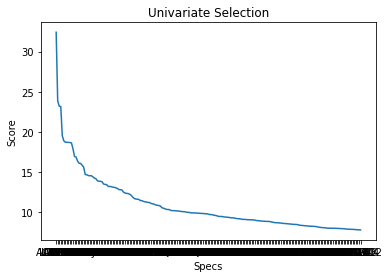

In [ ]:
plt.plot(  selectedFeatures["Specs"], selectedFeatures["Score"], label='linear')

plt.xlabel('Specs')
plt.ylabel('Score')
plt.title('Univariate Selection')
# plt.savefig('drive/My Drive/FYP/plots/FeatureReduceFrom2K_200.png', dpi=400)
plt.show()

In [ ]:
# X = df_200F.drop("class",1)   #Feature Matrix
# y = df_200F["class"] 

In [ ]:
X.shape

(161, 2312)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
printClassificationResults(X_train, X_test, y_train, y_test)

						 Testing	 Training
Gaussian Naive Bayes model accuracy(in %) 	: 83.67 	 83.03
Decision Tree model accuracy(in %) 		: 85.71 	 77.76
Nearest Neighbors model accuracy(in %) 		: 83.67 	 85.7
SVM + Gaussian kernel model accuracy(in %) 	: 83.67 	 91.96
SVM + linear kerne model accuracy(in %) 	: 95.92 	 90.21
Random forest model accuracy(in %) 	 	: 83.67 	 88.38


Include Meta Data of GSE5281

In [ ]:
# meta_data = pd.read_csv('drive/My Drive/FYP/dataset/GSE5281/gse_5281_meta_data.csv', index_col=0).T

In [ ]:
# meta_data.head()

ID,Sex,Age
GSM119615,male,63
GSM119616,male,85
GSM119617,male,80
GSM119618,male,80
GSM119619,female,102


In [ ]:
# df200_with_meta = pd.concat([df_200F, meta_data], axis=1, sort=False)
# df200_with_meta.head()

,SST,CHGB,CALY,CHRM1,GOT1,STAT4,NME1,AC004951.6,AX747182,SERTM1,PCSK1,ATP6V1G2,MT1M,GPI,LOC101929787,LOC100272216,MAFF,KIFAP3,MAL2,AMPH,SLC39A12,MTX2,MIR612,NEAT1,ZIC2,PCYOX1L,TAC1,ZNF204P,JPX,MDH1,CCK,PSMB3,NIT2,ATP5B,TMEM200A,ATP6V1B2,DHCR24,SLIRP,VSNL1,MGC12488,...,SLC12A7,APLNR,MAP2K1,SLC35B1,CACNA2D3,PCDH8,GLRB,NEFL,YAP1,NRSN1,SLC9A6,CAPNS1,ALAS1,FIG4,PSENEN,GFAP,IMMT,SUCLA2,FHL2,AK090844,RAB33A,ZCCHC24,PPEF1,MLLT11,RGS4,SLC16A14,SNCA,PRR34-AS1,RGS7,NRXN3,NAA20,UCHL3,HACL1,ATP6V0B,ATP1A1,SLITRK4,MAP7D2,class,Sex,Age
GSM119619,9.820469,9.230820,6.719501,7.177746,7.966393,6.153760,8.338353,3.590518,3.590518,6.930045,6.690597,8.947760,4.743912,8.350846,5.228459,6.785353,5.220601,7.127253,9.211837,9.256675,5.360266,7.971362,4.845992,4.845992,4.778356,6.846255,9.312080,7.200142,3.003917,11.759778,9.423194,7.365393,7.489957,9.778586,8.368750,10.092938,8.010270,8.065691,10.858154,4.673697,...,5.854620,4.936726,8.956529,6.474409,8.466506,9.983657,7.696830,10.167188,4.075549,8.777251,9.862478,7.814851,7.751669,8.701667,5.069903,6.793184,7.869865,8.728413,6.947103,5.085018,7.842291,6.909034,5.465145,11.596214,8.258840,9.072204,8.954750,6.282552,7.301119,8.285918,8.664166,6.133759,5.540673,8.205254,9.832953,7.663027,9.157813,0.0,female,102
GSM119624,8.138738,7.949630,8.094080,9.590066,7.989048,7.447393,7.641377,3.753409,3.753409,5.990190,5.130439,8.908487,5.548599,9.232857,4.180991,4.958589,5.109734,5.101465,5.662055,8.617258,2.785920,6.620853,4.326038,4.326038,3.196892,7.937863,3.993809,6.528508,3.124620,9.848791,8.574007,8.781592,6.032656,9.993400,8.411121,8.126093,6.983828,8.328318,9.717208,4.590936,...,6.244392,5.304075,6.860651,6.416887,7.473716,6.109632,6.108671,9.218382,3.068169,7.046863,8.748288,8.033215,7.503686,10.390639,5.627247,6.620438,7.090960,7.985616,7.185062,4.718082,6.783818,6.475022,6.156712,11.923355,7.030699,7.261290,7.493776,5.601827,7.058973,6.697640,7.249510,4.655565,6.483652,7.047278,8.885407,6.451168,8.289224,0.0,female,88
GSM119625,9.057913,8.414206,7.321699,8.524210,7.940641,6.644726,8.372081,4.899204,4.899204,6.519781,4.834514,9.360485,5.202009,9.319306,5.286141,5.697636,4.811076,5.894823,7.564356,9.626140,4.192204,7.632245,4.293368,4.293368,4.707349,7.200958,6.518614,6.825018,3.321504,10.975230,9.561881,8.226336,6.589793,10.096394,6.614909,8.630886,7.806078,8.968011,10.764459,4.866047,...,7.047772,4.497436,8.377882,6.556439,7.593218,7.758842,6.800714,9.626244,3.600534,7.939223,9.743837,7.739995,7.175489,8.715433,5.547671,7.151837,7.579509,8.037119,6.477220,5.048232,7.331129,7.276934,4.499216,12.116215,8.332236,7.781828,8.607674,6.402627,6.981225,7.215548,7.337996,5.702944,5.811688,7.607745,9.885622,7.476292,8.343236,0.0,female,82
GSM119631,8.071041,10.879769,7.082659,7.589881,7.864345,4.800809,8.984301,3.836906,3.836906,6.203744,4.591450,9.366488,4.244963,8.791113,4.842491,5.783998,4.933126,7.287949,7.909894,10.931945,5.523769,8.244906,5.077575,5.077575,5.761937,6.129378,8.005986,7.681855,2.966847,11.358170,10.179458,8.621336,6.674601,9.454765,4.539743,9.989594,9.560859,7.965183,9.513211,3.873229,...,6.136818,5.914006,9.173115,6.269632,9.148368,10.046208,7.389397,9.262391,4.701712,4.801644,11.031116,8.434525,6.471896,8.341385,5.491636,8.534400,7.833088,7.714166,7.213625,4.439053,6.002946,6.807968,2.869112,11.434066,5.238552,8.220009,8.807938,5.506557,6.836479,8.042636,8.165971,6.251375,4.591686,7.572808,10.210140,7.421951,9.519599,0.0,female,102
GSM119637,7.557063,11.631040,7.291014,7.669955,8.987054,4.382071,9.509157,2.963183,2.963183,6.244131,3.668875,10.248823,5.514044,9.219761,4.340818,3.753869,5.599310,8.085117,8.987121,11.618226,4.743859,9.055430,4.532462,4.532462,5.170949,6.873594,8.646339,8.073805,2.527461,12.225496,11.440809,9.221793,7.846139,10.707741,3.936072,10.800038,9.782730,8.021299,10.290289,3.039203,...,6.191711,5.887948,10.180819,6.973343,8.981638,10.420445,7.963253,10.192188,4.379492,4.983564,11.286645,8.700864,7.756876,8.493176,6.013996,8.240272,8.493640,8.710875,8.440510,4.196384,7.

In [ ]:
# df200_with_meta.shape

(161, 203)

Select Data 

In [ ]:
# df_200F = df200_with_meta.loc[meta_data['Sex'] == "female"]
# df_200F.shape
# df_200F = df200_with_meta

In [ ]:
# df_200F = df_200F.drop("Sex",1)
# df_200F = df_200F.drop("Age",1)
# df_200F.shape

(161, 201)

**Features 50 | PCA, RF, FI**

PCA

In [ ]:
X = df_200F.iloc[:,0:200].values
initial_feature_names = df_200F.columns[0:200].values

# 160 samples with 2312 features
train_features = X

model = PCA(n_components=63).fit(train_features) #n_components=63
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

df_50F_PCA = df_200F[most_important_names]
df_50F_PCA = df_50F_PCA.T.drop_duplicates().T
df_50F_PCA.head()

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df_50F_PCA,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_50F_PCA.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
selectedFeatures = featureScores.nlargest(50,'Score')

pd.options.mode.chained_assignment = None

df_50F_PCA = df_200F[selectedFeatures['Specs'].values]
df_50F_PCA.head()

Symbol,SST,CHGB,STAT4,AC004951.6,PCSK1,LOC101929787,MAFF,AMPH,SLC39A12,ZIC2,PCYOX1L,TAC1,JPX,TMEM200A,SLIRP,SLC39A10,SPHKAP,CALB1,CDK7,AP2M1,LOC100507557,CTD-3092A11.2,PLK2,P2RY14,RP11-271C24.3,EMX2,SERPINF1,ARPC1A,PVALB,LOC101060510,PRO1804,VAMP7,LSM7,ATP1A3,PCP4,EXOC8,RIT2,BCAS1,PSMB4,LAMP5,APLNR,PCDH8,NRSN1,CAPNS1,ALAS1,FIG4,RAB33A,SLC16A14,PRR34-AS1,HACL1
GSM119615,8.131880,8.038977,5.177266,4.923159,5.573235,5.885994,4.681431,8.915695,6.329852,5.868591,6.328347,8.347192,2.934900,7.526488,7.639021,10.199013,7.920694,8.111939,5.991551,7.523458,5.955693,6.234271,8.487451,2.971024,5.431511,6.490630,5.153245,5.329530,3.304045,3.859152,2.802982,7.482095,5.045915,5.102492,4.735953,7.041757,4.324273,4.831459,7.264296,9.253145,4.528372,9.860453,8.675869,6.251841,5.816591,7.935832,5.783877,8.620085,6.325037,4.698036
GSM119616,9.505370,6.843639,5.937782,4.308553,4.320161,5.867583,4.849331,8.320264,3.686194,4.223862,7.514385,5.181012,2.920651,8.268992,8.470085,7.771487,9.790290,5.465154,5.587375,9.588686,4.670569,5.005823,7.816177,3.159084,4.446860,5.443588,5.461562,6.196485,3.192075,4.091643,3.253896,7.807970,5.664211,5.894220,9.102685,6.184814,6.464120,4.937744,7.160032,7.471124,5.458683,8.018103,7.639978,7.135552,6.144733,9.000454,6.146401,7.498362,6.648298,5.302263
GSM119617,5.369160,4.665645,4.486761,5.665046,3.173762,4.493120,4.266874,5.044705,3.599311,4.741784,5.884224,2.750926,2.957573,4.875246,6.446468,3.669295,7.483633,3.847214,3.429036,7.054827,3.652799,3.229870,4.030926,2.938423,3.789036,4.920599,5.091015,4.849251,4.204252,5.206305,3.318496,4.373615,5.241433,4.964589,6.768867,3.333714,5.303890,5.199378,4.839413,6.211069,5.016607,4.923356,6.366537,6.485473,4.318861,8.097815,4.677529,4.069276,6.747926,3.793645
GSM119618,5.999060,5.293017,4.517919,5.699413,3.239969,4.852395,4.890228,6.075690,3.675883,4.456430,6.072395,3.954933,3.929218,4.715554,6.445284,4.248059,7.520529,4.386694,3.643459,7.589096,4.199660,4.139703,4.449957,3.368070,3.380862,5.171191,5.572379,4.237645,4.055670,4.909771,3.573662,5.068663,5.702171,4.894342,6.546067,3.709285,5.444782,5.306186,5.629356,7.150529,5.455425,5.021351,6.384433,6.555934,4.342724,8.521468,5.180804,4.978548,7.378966,4.159845
GSM119619,9.820469,9.230820,6.153760,3.590518,6.690597,5.228459,5.220601,9.256675,5.360266,4.778356,6.846255,9.312080,3.003917,8.368750,8.065691,9.684822,9.863674,7.852904,6.297597,8.772451,5.164646,5.438326,9.634277,3.034547,5.949395,5.639989,6.940059,6.648078,2.966490,4.315392,3.736663,8.324175,6.510204,5.455270,8.148804,7.708691,7.648897,5.991257,8.742000,8.875233,4.936726,9.983657,8.777251,7.814851,7.751669,8.701667,7.842291,9.072204,6.282552,5.540673


**Random Forest**

In [ ]:
y = df_200F["class"] 
X = df_200F.drop("class",1)

model = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

rf_selected = feat_importances.nlargest(50)
df_50F_RF = df_200F[pd.DataFrame(rf_selected).T.columns]
df_50F_RF.head()

Symbol,NEAT1,MIR612,PCYOX1L,CTD-3092A11.2,SLC12A7,FIBP,MLLT11,CKMT1B,JPX,GNG3,SST,CKMT1A,NIT2,ATP6V1E1,MAFF,MGC12488,LDHA,FIG4,LOC101929787,LOC202181,MT1M,ATP6V1G2,ATP5B,TUBB4B,LOC100272216,REEP1,CHRM1,COPG2IT1,TUBB3,AK090844,PSMB3,PRO1804,MIF,MKKS,GFAP,RGS7,CDK5,IMMT,PSMA5,PLSCR4,LRP4,BSCL2,PRR34-AS1,RP11-271C24.3,GPI,DDIT4,SLC39A12,YAP1,ATP5C1,AC004951.6
GSM119615,5.166372,5.166372,6.328347,6.234271,6.635072,6.595596,10.847098,8.201329,2.934900,6.841425,8.131880,8.201329,6.257113,9.259674,4.681431,4.911598,9.807129,7.935832,5.885994,5.811519,3.951437,8.434417,8.455516,8.397324,6.083629,9.239311,5.960189,9.338945,8.508980,5.298147,6.893028,2.802982,6.903272,6.671874,7.054613,6.384926,6.401769,7.414872,7.394662,7.990181,6.858376,7.311897,6.325037,5.431511,6.968975,5.998235,6.329852,4.186140,8.054591,4.923159
GSM119616,4.380328,4.380328,7.514385,5.005823,6.375591,7.521197,11.668155,8.870197,2.920651,8.851567,9.505370,8.870197,6.331245,9.708419,4.849331,4.862214,10.449169,9.000454,5.867583,5.391976,4.281796,8.430603,8.937122,10.071488,5.881952,9.490227,8.256848,9.717401,9.969508,5.279988,8.121838,3.253896,9.152408,6.873441,7.491630,6.447447,7.278494,6.946851,7.992021,5.505412,5.390431,8.611296,6.648298,4.446860,8.000928,5.699054,3.686194,3.566653,7.878662,4.308553
GSM119617,4.598128,4.598128,5.884224,3.229870,6.730196,5.189787,9.503726,7.377548,2.957573,7.323527,5.369160,7.377548,3.925424,7.894916,4.266874,5.294911,8.768251,8.097815,4.493120,6.089924,5.513703,5.653338,7.702212,8.373125,6.389841,5.629927,6.834361,6.897656,7.360946,6.716955,5.935664,3.318496,7.786636,4.540740,7.186470,5.840032,6.248266,5.193497,5.353858,5.278103,6.058974,6.564729,6.747926,3.789036,6.178967,6.189776,3.599311,3.534403,5.802052,5.665046
GSM119618,4.777270,4.777270,6.072395,4.139703,6.818696,6.158026,10.139533,7.902732,3.929218,7.824866,5.999060,7.902732,4.373662,8.112316,4.890228,5.940631,8.947312,8.521468,4.852395,6.108970,5.696868,6.032224,7.954236,8.803324,6.174321,6.123746,7.863578,7.860477,8.035239,6.608849,6.574085,3.573662,9.010986,4.960010,7.553568,5.936174,6.564238,5.467763,5.958694,5.529360,5.839632,7.676403,7.378966,3.380862,6.902142,6.578980,3.675883,3.333360,6.280982,5.699413
GSM119619,4.845992,4.845992,6.846255,5.438326,5.854620,7.519347,11.596214,8.721634,3.003917,7.981928,9.820469,8.721634,7.489957,10.559268,5.220601,4.673697,11.210182,8.701667,5.228459,5.863683,4.743912,8.947760,9.778586,10.043683,6.785353,9.896433,7.177746,10.127116,10.437412,5.085018,7.365393,3.736663,8.475356,7.651965,6.793184,7.301119,7.157453,7.869865,8.860160,7.178267,6.522305,9.169282,6.282552,5.949395,8.350846,6.886607,5.360266,4.075549,8.693968,3.590518


**Feature Impotance**

In [ ]:
y = df_200F["class"] 
X = df_200F.drop("class",1)   

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

fi_selected = feat_importances.nlargest(50)
df_50F_FI = df_200F[pd.DataFrame(fi_selected).T.columns]
df_50F_FI.head()

Symbol,CTD-3092A11.2,JPX,SST,SLC12A7,MKKS,CHRM1,AK090844,MGC12488,PCYOX1L,ATP5B,NEAT1,ATP1A3,HMP19,MLLT11,CKMT1A,MDH1,LOC100272216,CALY,GNG3,C12orf10,TUBB4B,MIR612,PSMB3,CDK5,MT1M,ATP6V1E1,CCNH,GABRG2,MAFF,BCAS2,KIAA1279,NIT2,ZCCHC24,RPH3A,GOT1,PRO1804,ZNF415,GFAP,SLC39A12,BEX5,LOC101929787,SMYD3,AX747182,BSCL2,CKMT1B,LOC101060510,RP11-271C24.3,LOC202181,SLC35B1,IMMT
GSM119615,6.234271,2.934900,8.131880,6.635072,6.671874,5.960189,5.298147,4.911598,6.328347,8.455516,5.166372,5.102492,8.747482,10.847098,8.201329,10.763783,6.083629,5.151241,6.841425,4.999544,8.397324,5.166372,6.893028,6.401769,3.951437,9.259674,7.011247,6.809621,4.681431,7.112771,6.606668,6.257113,7.456909,5.740895,6.496582,2.802982,5.994068,7.054613,6.329852,10.226638,5.885994,6.677840,4.923159,7.311897,8.201329,3.859152,5.431511,5.811519,5.278402,7.414872
GSM119616,5.005823,2.920651,9.505370,6.375591,6.873441,8.256848,5.279988,4.862214,7.514385,8.937122,4.380328,5.894220,8.914857,11.668155,8.870197,9.269761,5.881952,5.565685,8.851567,6.024740,10.071488,4.380328,8.121838,7.278494,4.281796,9.708419,6.292830,6.926029,4.849331,6.841151,5.466316,6.331245,7.418142,8.058232,6.808876,3.253896,6.231582,7.491630,3.686194,10.159549,5.867583,6.339473,4.308553,8.611296,8.870197,4.091643,4.446860,5.391976,6.062100,6.946851
GSM119617,3.229870,2.957573,5.369160,6.730196,4.540740,6.834361,6.716955,5.294911,5.884224,7.702212,4.598128,4.964589,7.349384,9.503726,7.377548,6.592042,6.389841,4.252331,7.323527,4.946727,8.373125,4.598128,5.935664,6.248266,5.513703,7.894916,4.383398,4.827746,4.266874,5.282998,3.939829,3.925424,7.630651,6.974983,4.808397,3.318496,4.269931,7.186470,3.599311,7.661803,4.493120,4.923239,5.665046,6.564729,7.377548,5.206305,3.789036,6.089924,4.735439,5.193497
GSM119618,4.139703,3.929218,5.999060,6.818696,4.960010,7.863578,6.608849,5.940631,6.072395,7.954236,4.777270,4.894342,7.786072,10.139533,7.902732,6.965705,6.174321,5.245800,7.824866,5.250660,8.803324,4.777270,6.574085,6.564238,5.696868,8.112316,4.509396,5.210587,4.890228,5.140573,4.373973,4.373662,7.807734,7.497208,4.886358,3.573662,5.016427,7.553568,3.675883,8.298259,4.852395,5.097336,5.699413,7.676403,7.902732,4.909771,3.380862,6.108970,4.704986,5.467763
GSM119619,5.438326,3.003917,9.820469,5.854620,7.651965,7.177746,5.085018,4.673697,6.846255,9.778586,4.845992,5.455270,9.658555,11.596214,8.721634,11.759778,6.785353,6.719501,7.981928,6.640256,10.043683,4.845992,7.365393,7.157453,4.743912,10.559268,7.967964,7.344021,5.220601,8.015720,7.350236,7.489957,6.909034,7.127367,7.966393,3.736663,6.010606,6.793184,5.360266,11.132838,5.228459,7.794837,3.590518,9.169282,8.721634,4.315392,5.949395,5.863683,6.474409,7.869865


Summary of results

In [ ]:
results_testing, results_training = getSummaryFeatureSelection(df_50F_PCA, df_50F_FI, df_50F_RF)

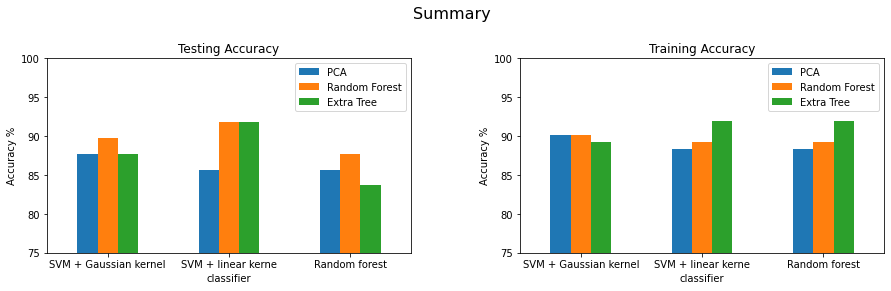

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.subplots_adjust(wspace=0.3, hspace=0.2, top=0.8)
fig.set_figwidth(15)

axes[0].set_ylim([75,100])
axes[1].set_ylim([75,100])
axes[0].set_ylabel("Accuracy %")
axes[1].set_ylabel("Accuracy %")
axes[0].set_title("Testing Accuracy")
axes[1].set_title("Training Accuracy")

fig.suptitle('Summary', fontsize=16)

results_testing.plot.bar(rot=0, ax=axes[0])
results_training.plot.bar(rot=0, ax=axes[1])

Get gene symbols

In [ ]:
df_geneSym_FI = pd.DataFrame( df_50F_FI.columns)
df_geneSym_PCA = pd.DataFrame( df_50F_PCA.columns)
df_geneSym_RF = pd.DataFrame( df_50F_RF.columns)

df_geneSym_FI.rename(columns  = {"Symbol": "probes.Symbol"}, 
                                 inplace = True) 
df_geneSym_PCA.rename(columns  = {"Symbol": "probes.Symbol"}, 
                                 inplace = True) 
df_geneSym_RF.rename(columns  = {"Symbol": "probes.Symbol"}, 
                                 inplace = True) 

In [ ]:
pca_col_list = list(df_geneSym_PCA['probes.Symbol'])
fi_col_list = list(df_geneSym_FI['probes.Symbol'])
rf_col_list = list(df_geneSym_RF['probes.Symbol'])

# pca_col_list = list(df_geneSym_PCA[0])
# fi_col_list = list(df_geneSym_FI[0])
# rf_col_list = list(df_geneSym_RF[0])

In [ ]:
def checkList(list1, list2):
  for word in list2:
    if word in list1:
      # print(word)
      list1.remove(word)
  
  return list1

In [ ]:
pca_col_list_uni = checkList(list(pca_col_list), list(fi_col_list + rf_col_list))
fi_col_list_uni = checkList(list(fi_col_list), list(pca_col_list + rf_col_list))
rf_col_list_uni = checkList(list(rf_col_list), list(fi_col_list + pca_col_list))

In [ ]:
t = list(set(pca_col_list) & set(fi_col_list) & set(rf_col_list))
# print(t)

After gene symbols

In [ ]:
pca_col = ['STAT4', 'AMPH', 'ZIC2', 'TAC1', 'TMEM200A', 'SLIRP', 'SLC39A10', 'SPHKAP', 'CALB1', 'CDK7', 'AP2M1', 'PLK2', 'P2RY14', 'EMX2', 'SERPINF1', 'ARPC1A', 'PVALB', 'LOC101060510', 'VAMP7', 'LSM7', 'ATP1A3', 'PCP4', 'EXOC8', 'RIT2', 'BCAS1', 'PSMB4', 'LAMP5', 'PCDH8', 'NRSN1', 'CAPNS1', 'ALAS1', 'RAB33A', 'SLC16A14', 'HACL1']
rf_col = ['SLC12A7', 'CKMT1B', 'ATP6V1E1', 'ATP5B', 'LOC100272216', 'REEP1', 'CHRM1', 'COPG2IT1', 'TUBB3', 'PSMB3', 'MIF', 'CDK5', 'IMMT', 'PSMA5', 'PLSCR4', 'LRP4', 'BSCL2', 'ATP5C1']
fi_col = ['TARBP1', 'C2orf80', 'CCNH', 'RNF175', 'EPDR1', 'FAM107B', 'FPGT-TNNI3K', 'DHCR24', 'GLRB', 'TUBA4A', 'HMP19', 'SERPINI1', 'NRXN3', 'SUCLA2', 'SDR16C5', 'C12orf10', 'GRAMD3', 'RPH3A']
all_found = ['AC004951.6','MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2' ,'RP11-271C24.3',
            'PRO1804' ,'PRR34-AS1']

# pca_col = pca_col_list_uni
# fi_col = fi_col_list_uni
# rf_col = rf_col_list_uni

# all_found = t

In [ ]:
print(len(pca_col), len(fi_col), len(rf_col))

34 18 18


Compare correlation of them

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


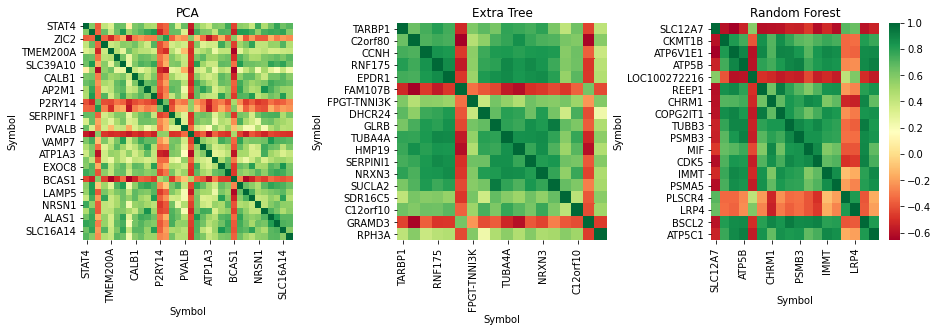

In [ ]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

cmp_corr_pca = X[pca_col].corr()
sns.heatmap(cmp_corr_pca, cmap="RdYlGn", ax=ax1, cbar=False)
ax1.set_title("PCA")

cmp_corr_fi = X[fi_col].corr()
sns.heatmap(cmp_corr_fi, cmap="RdYlGn", ax=ax2, cbar=False)
ax2.set_title("Extra Tree")

cmp_corr_rf = X[rf_col].corr()
sns.heatmap(cmp_corr_rf, cmap="RdYlGn", ax=ax3)
ax3.set_title("Random Forest")

fig.subplots_adjust(wspace = 0.5)
fig.set_figwidth(15)

In [ ]:
def getFeatureSummary(df):

  list0 = ["SVM + Gaussian kernel", "SVM + Linear kernel", "Random forest"]

  count = [len(pca_col),len(rf_col),len(fi_col),len(all_found)]

  diff_df = df[pca_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list1 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[rf_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list2 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[fi_col]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list3 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  diff_df = df[all_found]

  X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
  list4 = getTop3ClassificationResults(X_train, X_test, y_train, y_test)[:,0] #same dataset

  rows = ["classifier","PCA", "Random Forest", "Extra Tree", "Overlap"]

  data = np.array([list0,list1, list2,list3, list4])
  results = pd.DataFrame(data=data, index=rows).transpose()

  results = results.set_index('classifier')

  df_count = pd.DataFrame({'id':rows[1:5], 'val':count})

  return results, df_count

In [ ]:
results, count = getFeatureSummary(df_200F)
results = results.astype(float)

Text(0, 0.5, 'Accuracy')

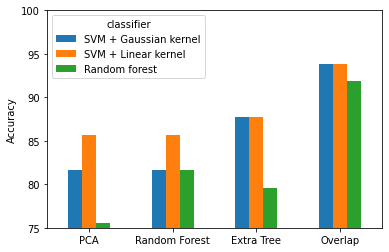

In [ ]:
results.T.plot.bar(rot=0)
axes = plt.gca()
axes.set_ylim([75,100])
axes.set_ylabel("Accuracy")
# plt.savefig('drive/My Drive/FYP/plots/with_overlap.png', dpi=400)

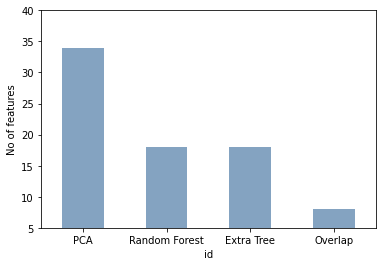

In [ ]:
count.plot.bar(x='id', y='val', rot=0,color=(0.2, 0.4, 0.6, 0.6))
axes = plt.gca()
axes.set_ylim([5,40])
axes.set_ylabel("No of features")
axes.get_legend().remove()
# plt.savefig('drive/My Drive/FYP/plots/with_overlap_no.png', dpi=400)

Analysis PCA data

In [ ]:
def getHighlyCorrelatedFeatures(corr, i):
  # Select upper triangle of correlation matrix
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > i)]

  return to_drop

In [ ]:
def compareCorrelatedFeatures(cmp_corr_pca, cmp_corr_fi,cmp_corr_rf):
  lists0 = []
  lists1 = []
  lists2 = []
  lists3 = []

  i = 0.95

  while i >= 0.8:

    lists0.append(i)
    lists1.append(len(getHighlyCorrelatedFeatures(cmp_corr_pca,i))*100/34)
    lists2.append(len(getHighlyCorrelatedFeatures(cmp_corr_rf,i))*100/18)
    lists3.append(len(getHighlyCorrelatedFeatures(cmp_corr_fi,i))*100/18)

    i = i - 0.005

  rows = ["Correlation value", "PCA", "Random Forest", "Extra Tree"]

  data = np.array([lists0, lists1, lists2,lists3])
  results = pd.DataFrame(data=data, index=rows).transpose()
  results = results.set_index('Correlation value')

  return results

Text(0.5, 1.0, 'Correlated Features vs correlation value')

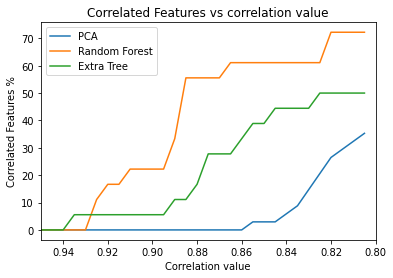

In [ ]:
results = compareCorrelatedFeatures(cmp_corr_pca, cmp_corr_fi,cmp_corr_rf)
g = results.plot.line()
g.set(xlim=(0.95,0.80))
g.set_ylabel("Correlated Features %")
g.set_title("Correlated Features vs correlation value")

Get most correlated and best fetaures from PCA and correlation analysis

In [ ]:
def svmLinear(dataFrame, target):

  clf = svm.SVC(kernel='linear') # Linear Kernel
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.svm import SVC

def svmGaussian(dataFrame, target):

  #Create a svm Classifier
  clf = SVC(kernel="rbf", gamma="auto", C=1)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.ensemble import RandomForestClassifier

def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

In [ ]:
def getSelectedDF(df, corr, ran):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= ran or corr.iloc[i,j] <= -ran:
              if columns[j]:
                  columns[j] = False

  selected_columns = df.columns[columns]
  df_selected = df[selected_columns]

  return df_selected

In [ ]:
def returnScoreDataFrame(dataFrame):
  lists0 = []
  lists1 = []
  lists2 = []
  lists3 = []
  lists4 = []

  i = 1

  while i >= 0.6:
  # for i in range(0,50):
    df_tmp = dataFrame
    df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), i)

    lists0.append(i)
    lists1.append(svmLinear(df_tmp, y))
    lists2.append(svmGaussian(df_tmp, y))
    lists3.append(randomForest(df_tmp, y))
    lists4.append(len(df_tmp.columns))

    i = i - 0.0025

  rows = ["i", "svmLinear", "svmGaussian", "randomForest", "No of features"]

  data = np.array([lists0, lists1, lists2,lists3, lists4])
  results = pd.DataFrame(data=data, index=rows).transpose()

  return results

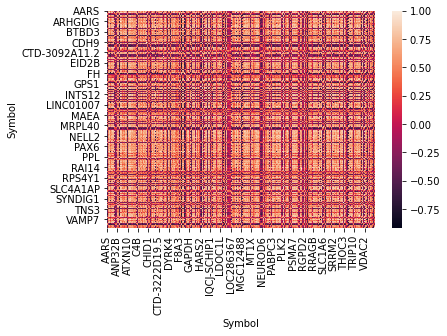

In [ ]:
corr = X.corr()
sns.heatmap(corr)

In [ ]:
corrScore = returnScoreDataFrame(X[pca_col])

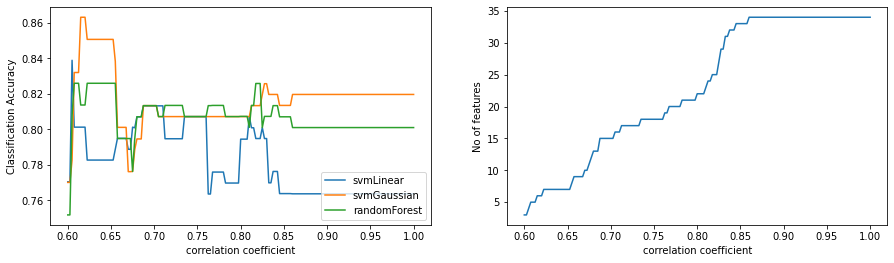

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(corrScore['i'], corrScore["svmLinear"], label='linear')
ax1.plot(corrScore['i'], corrScore["svmGaussian"], label='linear')
ax1.plot(corrScore['i'], corrScore["randomForest"], label='linear')

ax1.legend(['svmLinear', 'svmGaussian', 'randomForest', 'No of features'], loc='lower right')

ax1.set(xlabel='correlation coefficient', ylabel='Classification Accuracy')

ax2.plot(corrScore['i'], corrScore["No of features"], label='linear')
ax2.set(xlabel='correlation coefficient', ylabel='No of features')

fig.subplots_adjust(wspace = 0.2)
fig.set_figwidth(15)

# plt.savefig('drive/My Drive/FYP/plots/select_9_PCA.png', dpi=400)

plt.show()

Summary

In [ ]:
print("-- Max of svmLinear -- ")
print(corrScore.loc[corrScore['svmLinear'].idxmax()])
print("\n-- Max of svmGussian -- ")
print(corrScore.loc[corrScore['svmGaussian'].idxmax()])
print("\n-- Max of randomForest --")
print(corrScore.loc[corrScore['randomForest'].idxmax()])

-- Max of svmLinear -- 
i                 0.605000
svmLinear         0.838807
svmGaussian       0.782553
randomForest      0.807594
No of features    4.000000
Name: 158, dtype: float64

-- Max of svmGussian -- 
i                 0.620000
svmLinear         0.801188
svmGaussian       0.863033
randomForest      0.813650
No of features    6.000000
Name: 152, dtype: float64

-- Max of randomForest --
i                 0.655000
svmLinear         0.788842
svmGaussian       0.838225
randomForest      0.825879
No of features    8.000000
Name: 138, dtype: float64


ROC curves

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def getROC(X_train, X_test, y_train, y_test):

  classifier_SVM_li = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                  random_state=42))
  classifier_SVM_gu = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                  random_state=42))
  classifier_RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)

  y_score_SVM_li = classifier_SVM_li.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_gu = classifier_SVM_gu.fit(X_train, y_train).decision_function(X_test)
  y_score_SVM_RF = classifier_RF.fit(X_train, y_train)

  fpr_li, tpr_li, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_li.ravel())
  fpr_gu, tpr_gu, _ = roc_curve(np.int64(y_test.ravel()), y_score_SVM_gu.ravel())

  roc_auc_li = auc(fpr_li, tpr_li)
  roc_auc_gu = auc(fpr_gu, tpr_gu)

  y_pred_proba_RF = classifier_RF.predict_proba(X_test)[::,1]
  fpr_RF, tpr_RF, _ = metrics.roc_curve(np.int64(y_test.values),  y_pred_proba_RF)
  roc_auc_RF = metrics.roc_auc_score(np.int64(y_test.values), y_pred_proba_RF)

  plt.plot(fpr_li,tpr_li,label="SVM linear, auc="+str(round(roc_auc_li,2)))
  plt.plot(fpr_gu,tpr_gu,label="SVM gaussian, auc="+str(round(roc_auc_gu,2)))
  plt.plot(fpr_RF,tpr_RF,label="Random forest, auc="+str(round(roc_auc_RF,2)))

  plt.ylabel("Sensitivity")
  plt.xlabel("1 - Specificity")

  plt.legend(loc="lower right")

Compare results

Random Forest

(161, 107)
						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 89.8 	 93.74
SVM + linear kerne model accuracy(in %) 	: 89.8 	 91.94
Random forest model accuracy(in %) 		: 89.8 	 91.94


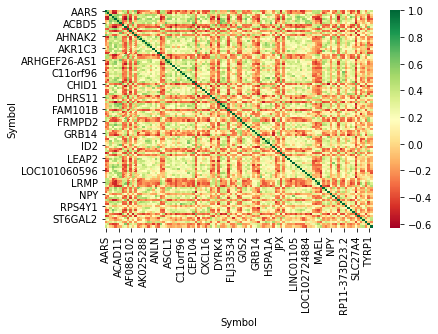

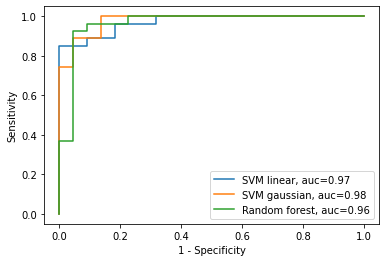

In [ ]:
df_tmp = X
df_tmp = getSelectedDF(df_tmp, df_tmp.corr(), corrScore.loc[corrScore['randomForest'].idxmax()][0]) #0.655
print(df_tmp.shape)
# plt.figure(figsize=(15,15))
g = sns.heatmap(df_tmp.corr(), cmap="RdYlGn")

# figure = g.get_figure()    
# figure.savefig('drive/My Drive/FYP/plots/PCA9_heatmap.png', dpi=400)

X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

# X_Test = df_Test[df_tmp.columns]
# y_Test = df_Test["class"]
# printTop3ClassificationResults(df_tmp, X_Test, y, y_Test) #other dataset

fig2 = plt.subplots(nrows=1, ncols=1) # two axes on figure

getROC(X_train, X_test, y_train, y_test)
# plt.savefig('drive/My Drive/FYP/plots/roc9.png', dpi=400)
# getROC(df_tmp, X_Test, y, y_Test)

# saveFoundSymbols(df_tmp,"brain_corr_26")

In [ ]:
final_pca_col = df_tmp.columns.values.tolist()

Final resuts

In [ ]:
# dis_gene = list(dict.fromkeys(all_found + final_pca_col))
dis_gene = list(all_found + final_pca_col)

In [ ]:
print(dis_gene)

['AC004951.6', 'MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2', 'RP11-271C24.3', 'PRO1804', 'PRR34-AS1', 'SST', 'CHGB', 'MT1M', 'SLC39A12', 'JPX', 'CTD-3092A11.2', 'RP11-271C24.3', 'APLNR', 'PPEF1']


In [ ]:
print(all_found)

['AC004951.6', 'MAFF', 'SLC39A12', 'PCYOX1L', 'CTD-3092A11.2', 'RP11-271C24.3', 'PRO1804', 'PRR34-AS1']


In [ ]:
print(final_pca_col)

['SST', 'CHGB', 'MT1M', 'SLC39A12', 'JPX', 'CTD-3092A11.2', 'RP11-271C24.3', 'APLNR', 'PPEF1']


						 Testing	 Training
SVM + Gaussian kernel model accuracy(in %) 	: 97.96 	 92.82
SVM + linear kerne model accuracy(in %) 	: 93.88 	 91.04
Random forest model accuracy(in %) 		: 91.84 	 91.04


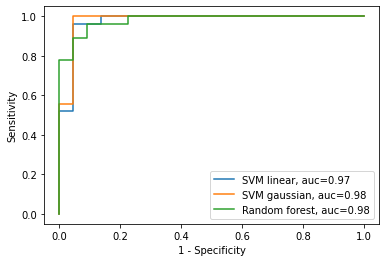

In [ ]:
diff_df = df_200F[dis_gene]

X_train, X_test, y_train, y_test = train_test_split(diff_df, y, test_size=0.3, random_state=42) 
printTop3ClassificationResults(X_train, X_test, y_train, y_test) #same dataset

getROC(X_train, X_test, y_train, y_test)

sensitivity and specificity

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
# score_svm_li = cross_val_score(svm_li_clf, diff_df, y, cv=3)
svm_li_clf.fit(diff_df, y)

y_pred_svm_li = svm_li_clf.predict(diff_df)

In [ ]:
cm = confusion_matrix(y, y_pred_svm_li)

In [ ]:
cm

array([[71,  3],
       [ 1, 86]])

Compare models

In [ ]:
def returnScoreDataFrameModels(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in [50, 40, 30, 20, 15, 10, 5, 3, 2 , 1]:

    # if a == 0:
    #   dataFrame = featureFI(dataFrame,y, i)
    # elif a ==1 :
    #   dataFrame = featureRF(dataFrame,y, i)
    # elif a == 2:
    #   dataFrame = featurePCA(dataFrame,y, i)

    lists1.append(svmLinear(dataFrame.iloc[:,0:(i)], y))
    lists2.append(svmGaussian(dataFrame.iloc[:,0:(i)], y))
    lists3.append(randomForest(dataFrame.iloc[:,0:(i)], y))

  rows = ["svmLinear", "svmGaussian", "randomForest"]

  data = np.array([lists1, lists2,lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore

In [ ]:
randomForestScore = returnScoreDataFrameModels(df_50F_RF)
featureImpotanceScore = returnScoreDataFrameModels(df_50F_FI)
pcaScore = returnScoreDataFrameModels(df_50F_PCA)

In [ ]:
# listx = []
# for i in range(0, 50):
#   listx.append(str(50-i))
  
pcaScore['x'] = ["50", "40", "30", "20", "15", "10", "5", "3", "2" , "1"]  
# pcaScore.head()

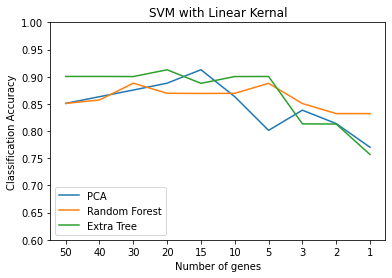

In [ ]:
plt.plot(pcaScore['x'], pcaScore["svmLinear"], label='linear')
plt.plot(pcaScore['x'], randomForestScore["svmLinear"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["svmLinear"], label='linear')

plt.ylim(0.6, 1)
# plt.xticks(np.arange(0, 50, 5)) #set(xlim=(0.95,0.80))

plt.legend(['PCA' ,'Random Forest', 'Extra Tree' ], loc='lower left')

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('SVM with Linear Kernal')
# plt.savefig('drive/My Drive/FYP/plots/cSVM_Linear_Kernal.png', dpi=400)
plt.show()

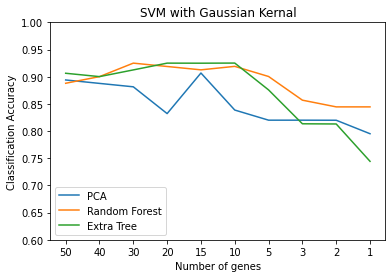

In [ ]:
plt.plot(pcaScore['x'], pcaScore["svmGaussian"], label='linear')
plt.plot(pcaScore['x'], randomForestScore["svmGaussian"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["svmGaussian"], label='linear')

plt.ylim(0.6, 1)
# plt.xticks(np.arange(0, 50, 5))

plt.legend(['PCA' ,'Random Forest', 'Extra Tree' ], loc='lower left')

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('SVM with Gaussian Kernal')
# plt.savefig('drive/My Drive/FYP/plots/SVM_Gaussian_Kernal.png', dpi=400)
plt.show()

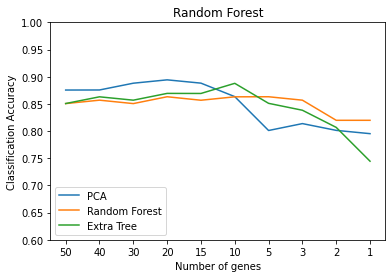

In [ ]:
plt.plot(pcaScore['x'], pcaScore["randomForest"], label='linear')
plt.plot(pcaScore['x'], randomForestScore["randomForest"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["randomForest"], label='linear')

plt.ylim(0.6, 1.0)
# plt.xticks(np.arange(0, 50, 5))

plt.legend(['PCA' ,'Random Forest', 'Extra Tree' ], loc='lower left')

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('Random Forest')
# plt.savefig('drive/My Drive/FYP/plots/RandomForest.png', dpi=400)
plt.show()